In [1]:
import pickle
import pandas as pd

from ribs.visualize import grid_archive_heatmap
import matplotlib.pyplot as plt
import imageio

In [2]:
#all_iterations = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900]
all_iterations = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]

In [6]:
def determine_grid_ticks(ranges, num_bin):
    range_beh = ranges
    num_bin = num_bin
    list_ranges = [range_beh[0]]
    n= list_ranges[0]
    for i in range(num_bin):
        n = n+((range_beh[1]-range_beh[0])/num_bin)
        list_ranges.append(n)
    return list_ranges

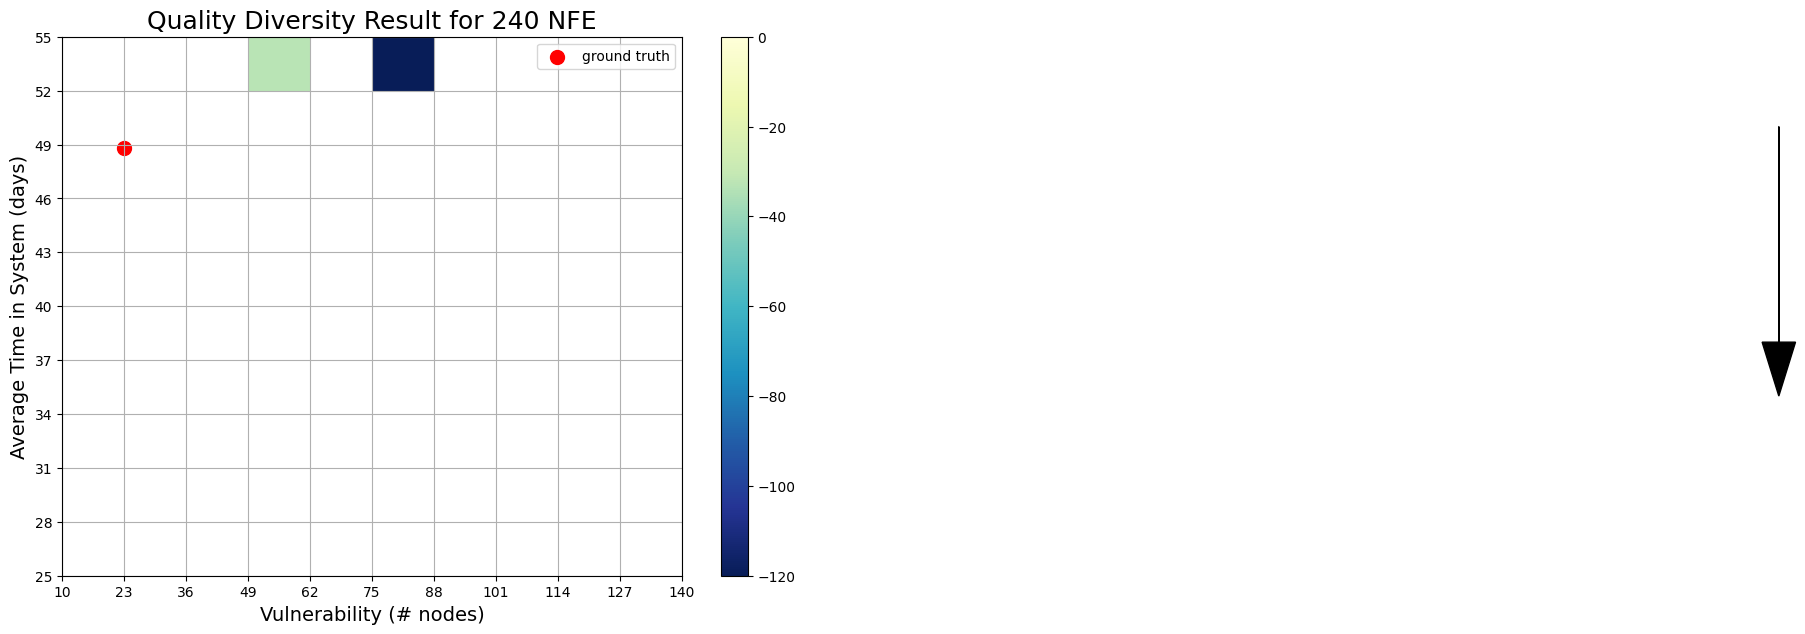

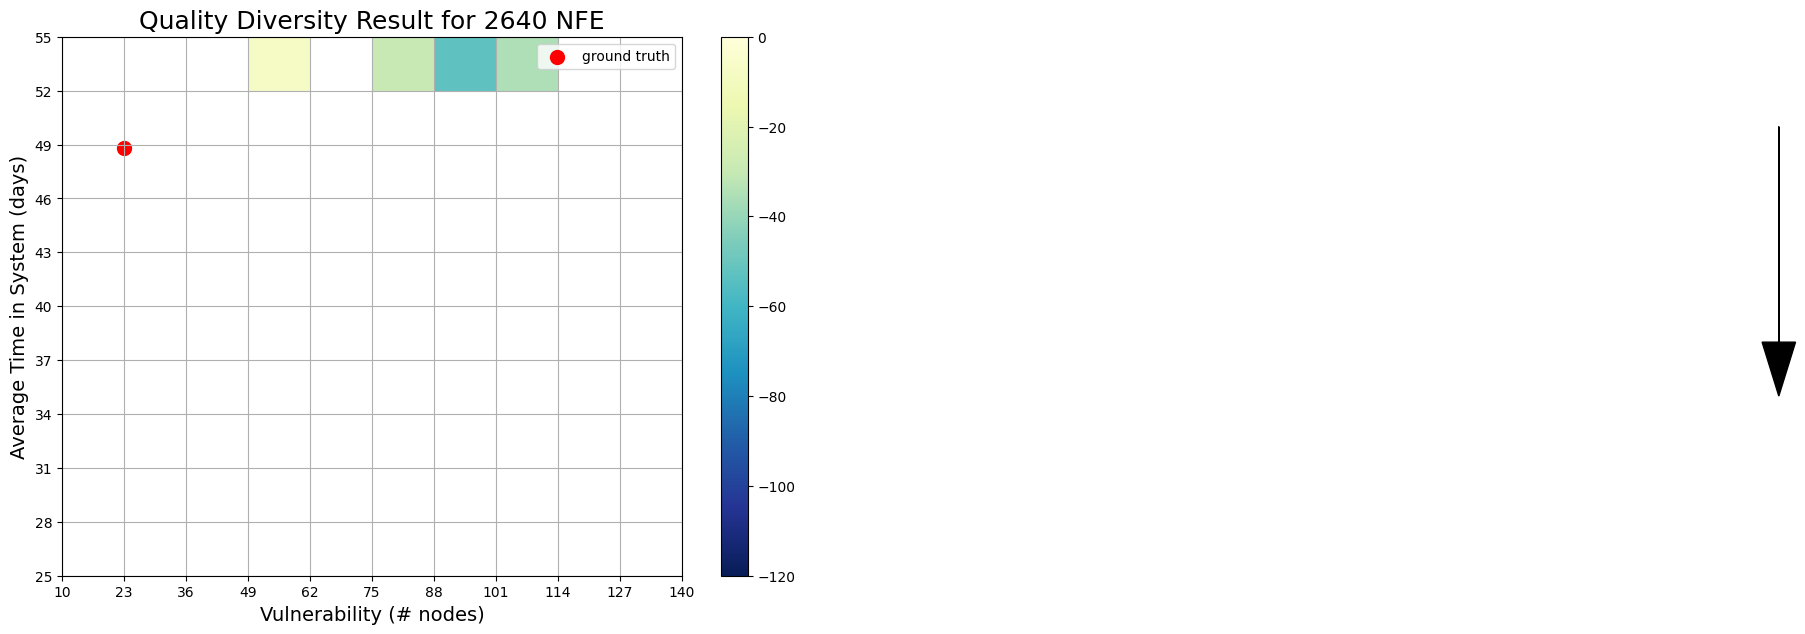

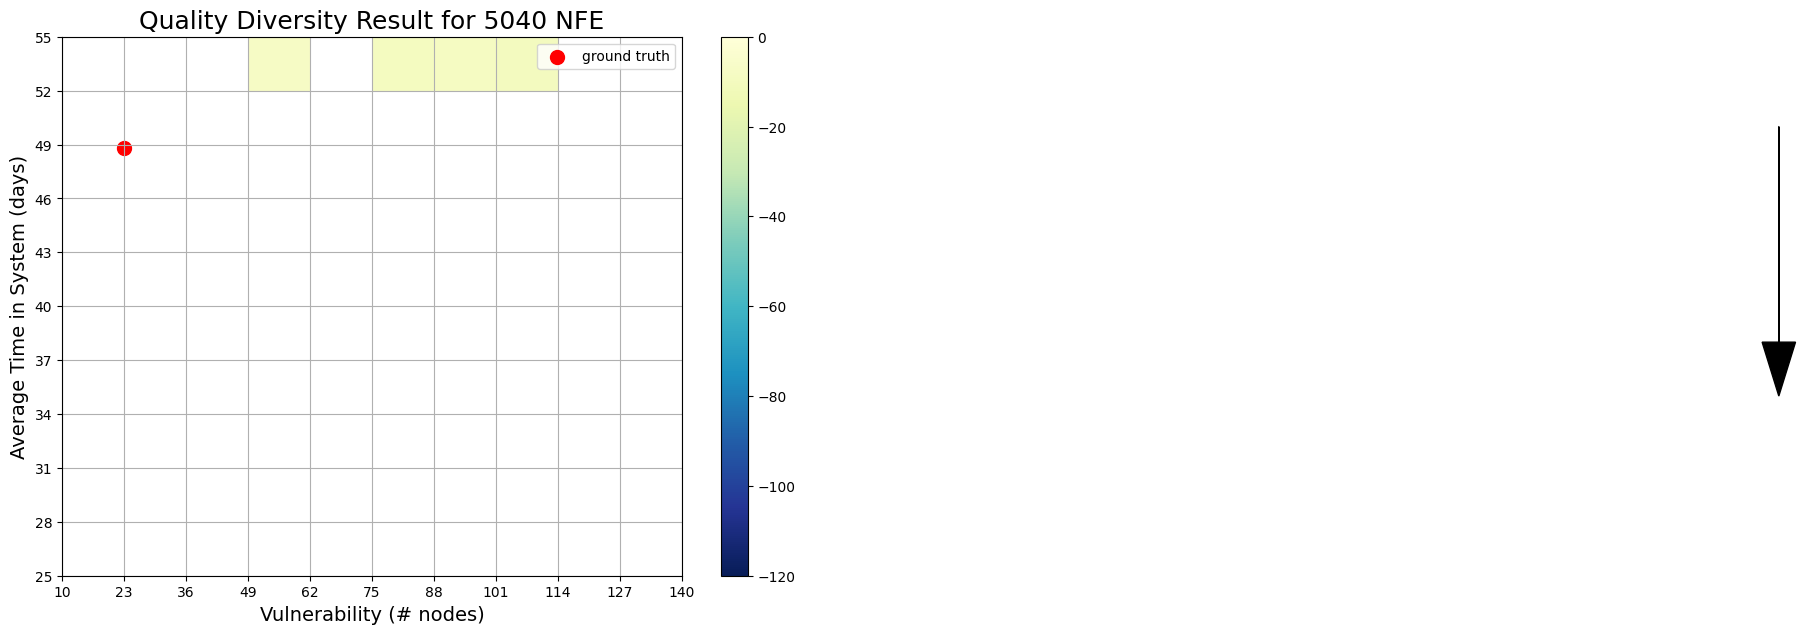

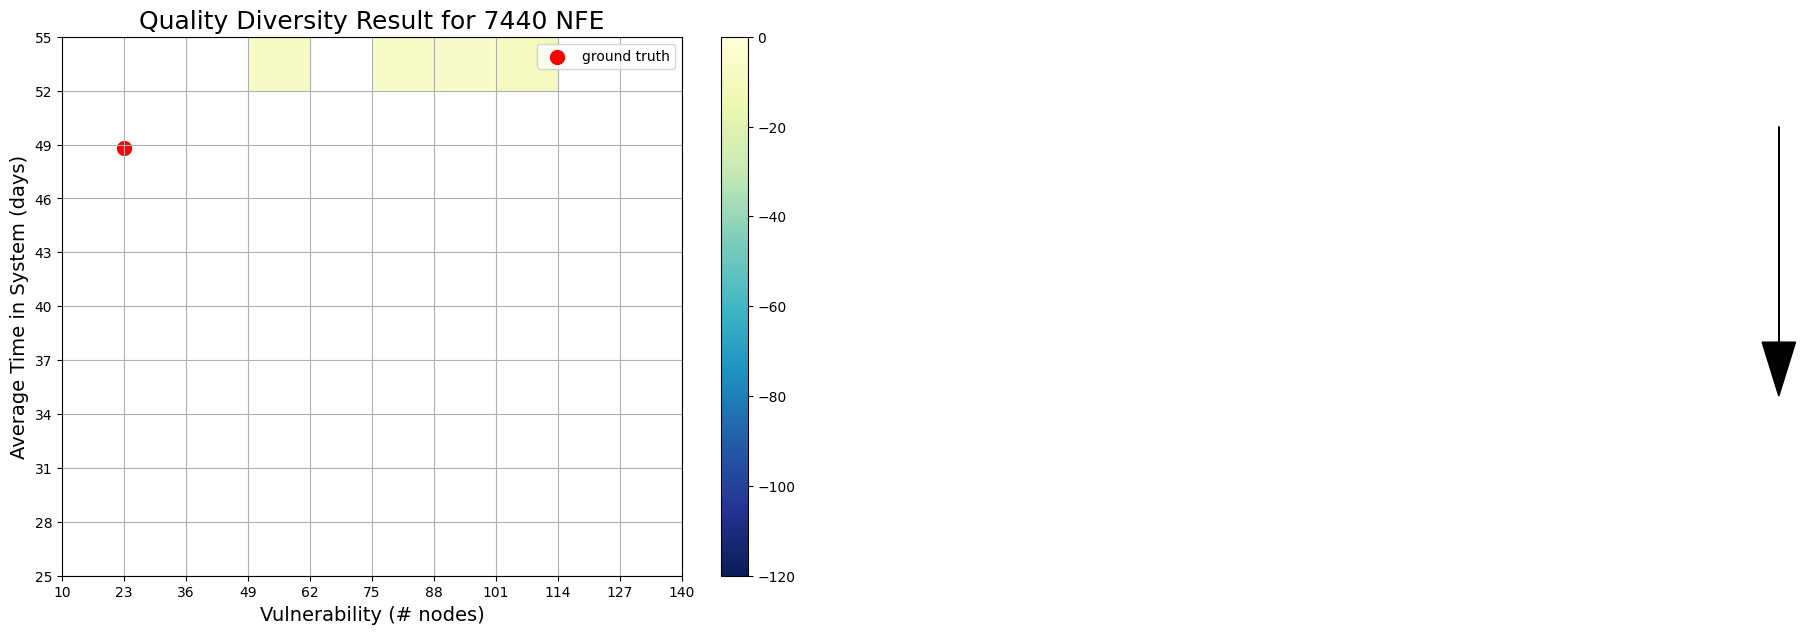

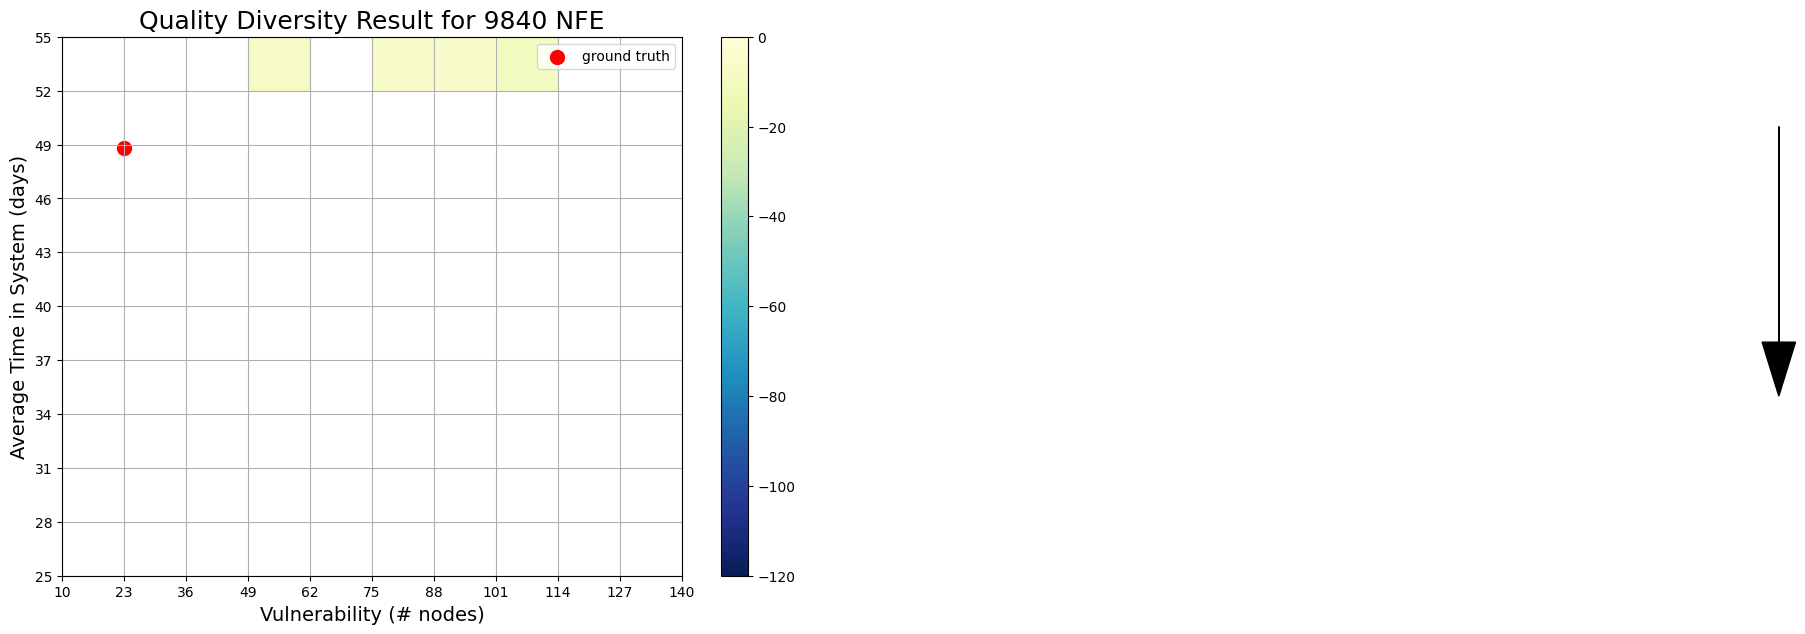

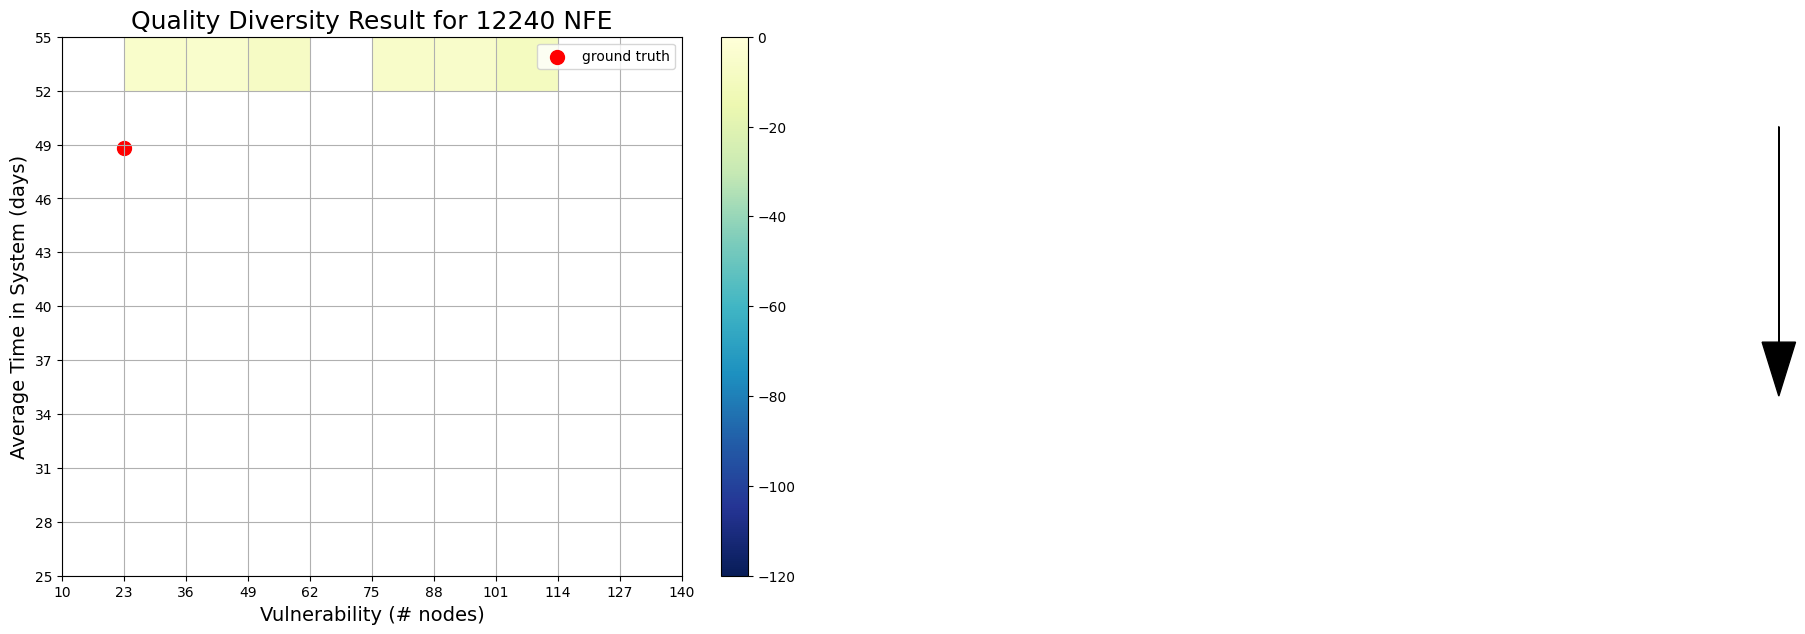

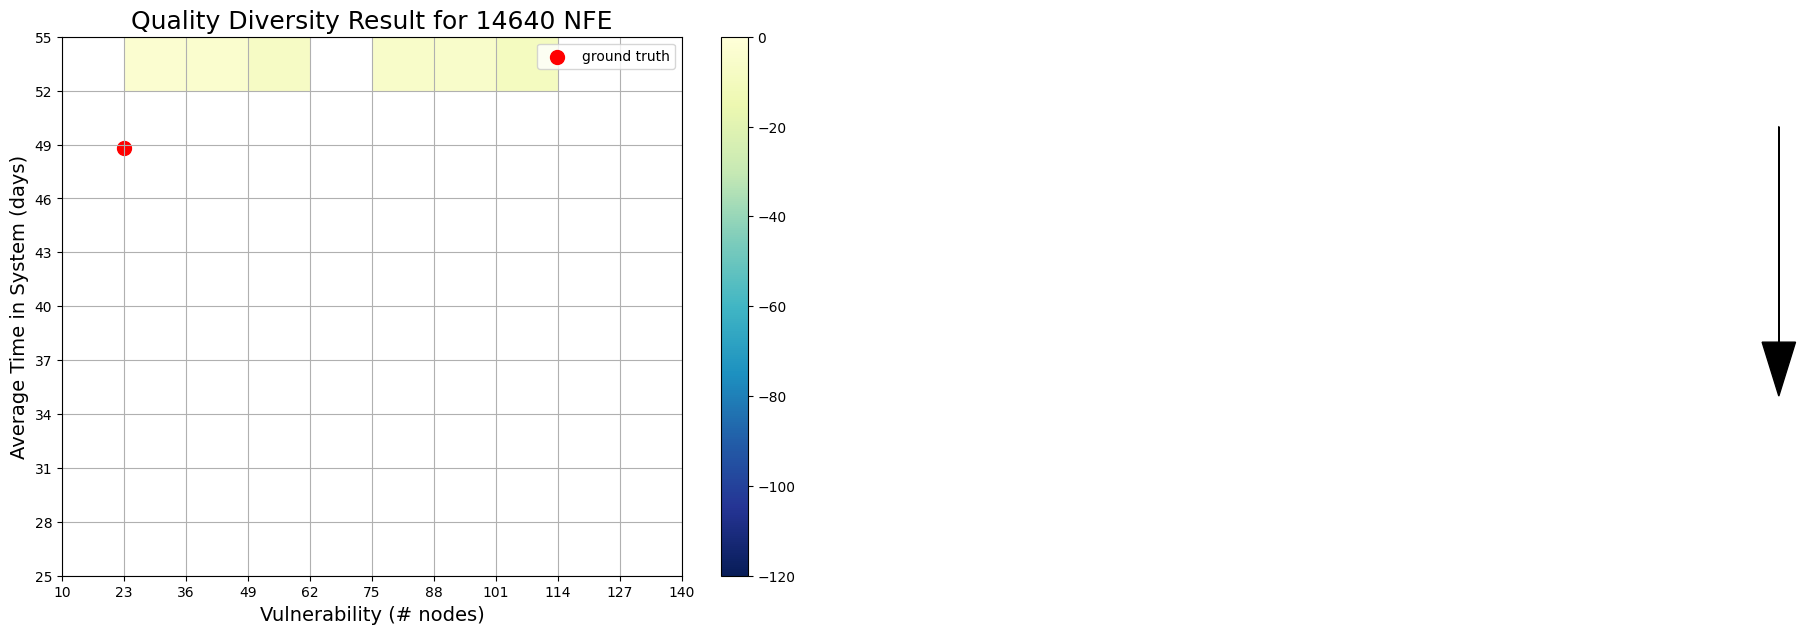

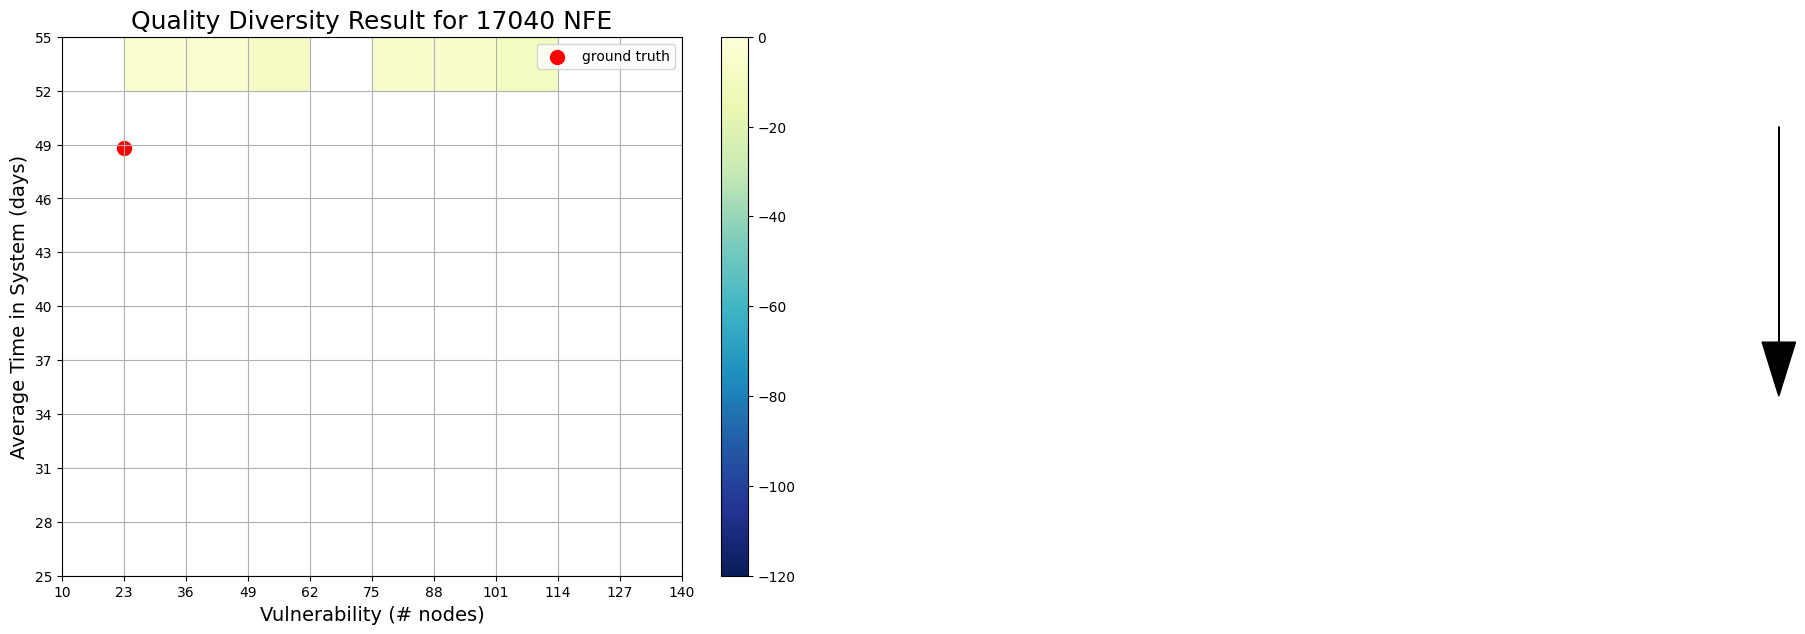

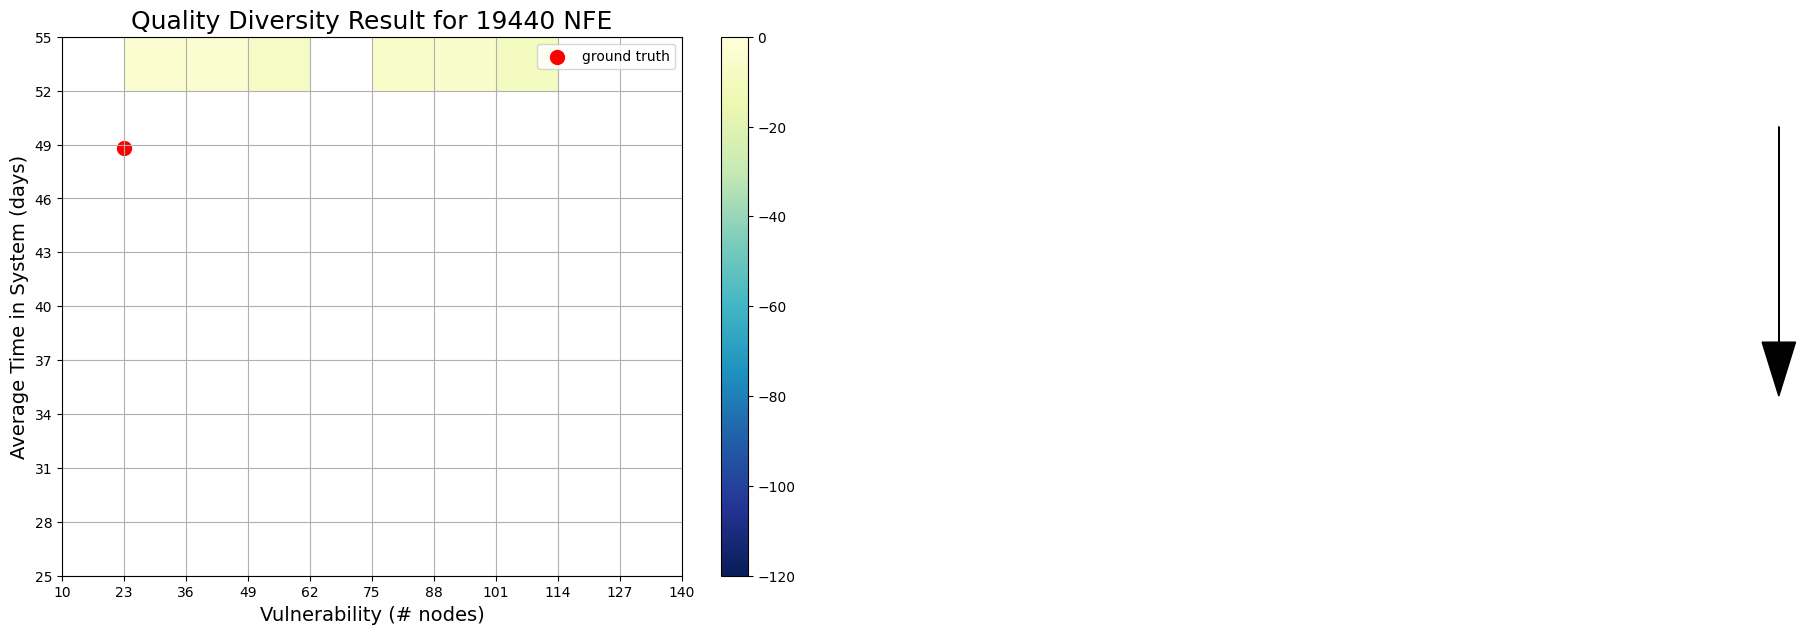

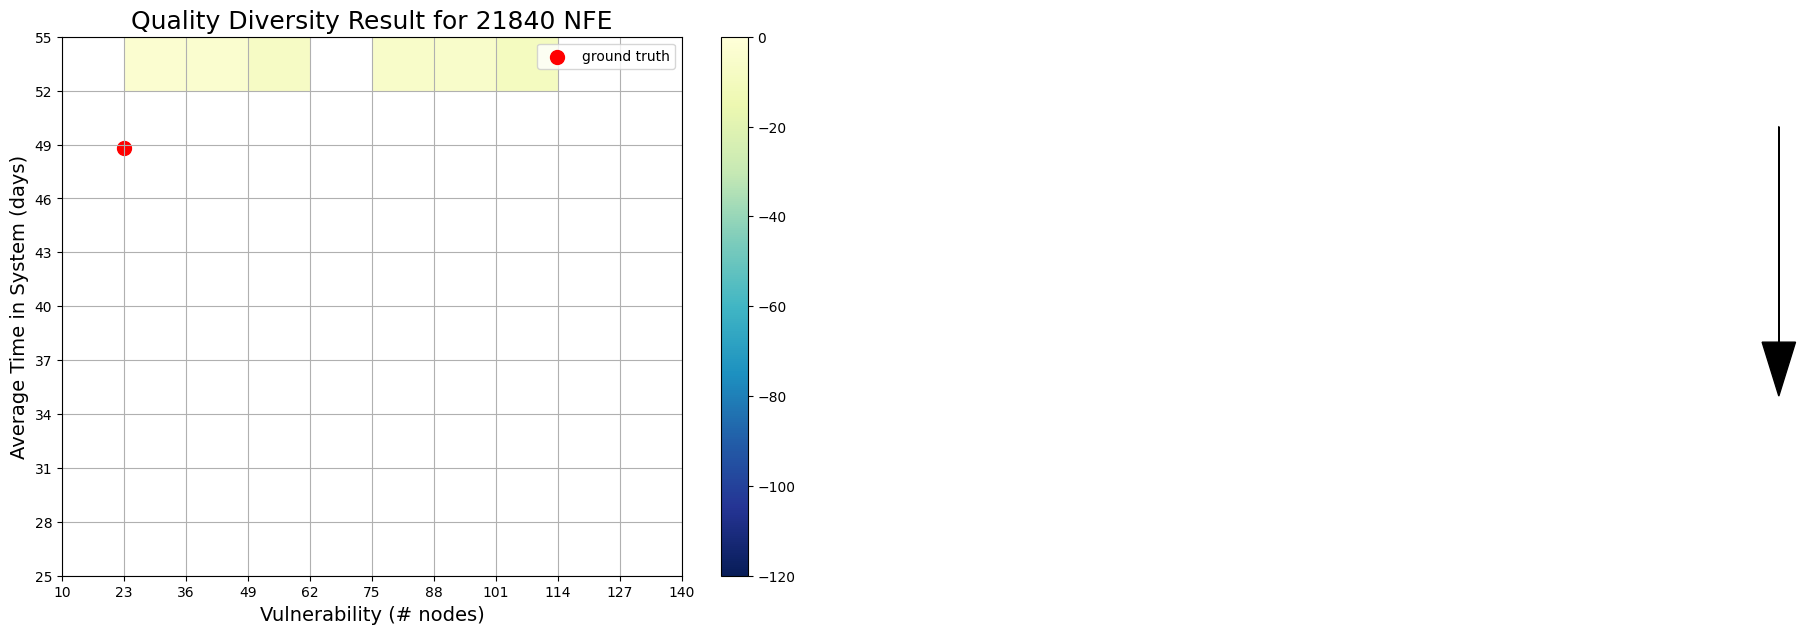

In [9]:
date="20231209_011014"
for it in all_iterations:
    with open("./results/"+date+"_Intermediate_Results_MAPElites_Iterations="+ str(it)+".pkl", 'rb') as file:
        raw_results = pickle.load(file)

    plt.figure(figsize=(10,7))
    grid_archive_heatmap(raw_results["archive"], cmap=plt.get_cmap('YlGnBu').reversed(), vmin=-120, vmax=0)
                    # cbar_kwargs = {"label":"L1 Distance",
                    #                 "labelpad": -70,
                    #                 "fontsize": 14})
    plt.scatter(23, 48.8, color="red", s= 100, label="ground truth")
    plt.xlabel("Vulnerability (# nodes)", fontsize = 14)
    plt.ylabel("Average Time in System (days)", fontsize= 14)
    plt.title("Quality Diversity Result for "+ str((it+1)*(48*5)) + " NFE",  fontsize = 18)
    
    plt.xticks(determine_grid_ticks((10, 140), 10))
    plt.yticks(determine_grid_ticks((25, 55), 10))
    plt.grid()
    plt.legend()

    plt.arrow(x=370, y=50, dx=0, dy=-15, clip_on=False, length_includes_head = True, color="black",
         head_width=7, head_length=3)
    
    plt.savefig("./results/images/"+ str(date)+ "_" +str(it) + "_iteration_qd_incl_ground_truth_NFE"+".png")
    plt.show()

In [11]:
all_iterations.append(1000)
with imageio.get_writer('./images/qd_GIF_50050NFE_grid.gif', mode='I', duration=0.8) as writer:
    for it in all_iterations:
        for filename in ['./images/'+ str(it)+" iteration_qd_incl_ground_truth_NFE"+".png"]:
            image = imageio.imread(filename)
            writer.append_data(image)

# # remove files
# for filename in set(['figs/test_route'+str(r)+'_step'+str(step)+'.png' for step in range(T) for r in range(R)]):
#     os.remove(filename)

C:\Users\IvS\AppData\Local\Temp\ipykernel_14808\4039682110.py:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


In [12]:
#not really working that well
with imageio.get_writer('./images/qd_MP4_50050NFE_grid.mp4', fps=1.2) as writer:
    for it in all_iterations:
        for filename in ['./images/'+ str(it)+" iteration_qd_incl_ground_truth_NFE"+".png"]:
            image = imageio.imread(filename)
            writer.append_data(image)

C:\Users\IvS\AppData\Local\Temp\ipykernel_14808\1918803552.py:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)
IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (720, 504) to (720, 512) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


In [3]:
raw_results

{'archive': <ribs.archives._grid_archive.GridArchive at 0x1dbf3fd3a00>,
 'emitter': [<ribs.emitters._gaussian_emitter.GaussianEmitter at 0x1db96b21d00>,
 'optimizer': <ribs.optimizers._optimizer.Optimizer at 0x1db96b1f910>,
 'sim_time': 411618.13386416435}

In [11]:
[(elite.sol, elite.obj) for elite in raw_results["archive"] if elite.obj < 3]

[(array([1.11199892e+00, 2.25057579e+00, 8.00000000e+03, 1.19431692e+02]),
  2.780837765957278)]

In [14]:
lst = [(elite.sol[0], elite.sol[1], elite.sol[2], elite.sol[3], elite.obj) for elite in raw_results["archive"]]
df = pd.DataFrame(lst, columns = ["Interarrival", "Manufacturing", "Link Transit Import", "Link Import Wholesales", "Obj"])

In [15]:
df

,Interarrival,Manufacturing,Link Transit Import,Link Import Wholesales,Obj
0,1.219969,2.454595,9309.351798,142.725545,3.043309
1,1.279263,3.032740,9708.774150,222.011846,4.864930
2,1.214489,2.421132,9090.214874,154.440880,3.615752
3,1.194093,2.303725,9151.380365,79.254658,3.861062
4,1.269786,1.777169,9344.968545,206.677625,4.461201
...,...,...,...,...,...
95,1.156184,2.121063,11000.000000,159.540142,4.349523
96,1.141712,2.276279,10871.944695,225.535510,4.607137
97,1.513465,2.710931,10722.041209,156.950118,4.029172
98,1.192012,2.318981,10678.390047,63.692396,3.941876
